In [1]:
from QuICT.core.gate import *
from QuICT.algorithm.quantum_algorithm.random_walk import RandomWalk, Graph
from QuICT.simulation.state_vector import ConstantStateVectorSimulator

In [2]:
import matplotlib.pyplot as plt

def plot(data, size):
    data = [data[i] + data[i+1] for i in range(0, size*2, 2)]
    for i in range(size):
        plt.bar(i, data[i])

In [3]:
# Build Circular Graph with different coin by vertices
vertices = 5
edges = {0: [4, 1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 0]}
coin_operators = [H.matrix, H.matrix, U2.matrix, U1.matrix, H.matrix]
graph_circular = Graph(vertices, edges, coin_operators)

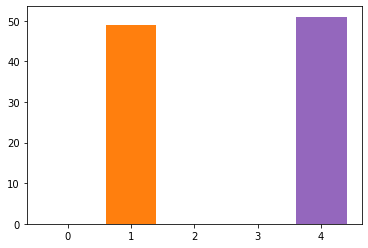

In [10]:
# Quantum Walk Algorithm
rw = RandomWalk(
    step=1,
    graph=graph_circular,
    coin_operator=H.matrix
)

rw_cir = rw.circuit

sim = ConstantStateVectorSimulator()
state = rw.run(sim, record_measured=True, shots = 100)

plot(state, vertices)